In [36]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')
img = load_img('./breast-histopathology-images/8867/cancer/8867_idx5_x451_y851_class1.png')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 300, 300, 3)
x.shape

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory


(1, 50, 50, 3)

In [37]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
# COMPILE
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [38]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        './breast-histopathology-images/8867/',  # this is the target directory
        target_size=(300, 300),  # all images will be resized to 300x300
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        './breast-histopathology-images/8914/',
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='binary')

Found 324 images belonging to 2 classes.
Found 150 images belonging to 2 classes.


In [39]:
# TRAINING
hist = model.fit_generator(
        train_generator,
        steps_per_epoch=800 // batch_size,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=160 // batch_size)

model.save_weights('50_epochs.h5')  # always save your weights after training or during training

Epoch 1/10
50/50 [==============================] - 33s 658ms/step - loss: 0.9435 - accuracy: 0.5554 - val_loss: 0.9200 - val_accuracy: 0.5000
Epoch 2/10
50/50 [==============================] - 28s 567ms/step - loss: 0.7255 - accuracy: 0.6165 - val_loss: 0.3352 - val_accuracy: 0.7800
Epoch 3/10
50/50 [==============================] - 29s 580ms/step - loss: 0.6499 - accuracy: 0.7343 - val_loss: 0.6659 - val_accuracy: 0.8467
Epoch 4/10
50/50 [==============================] - 29s 580ms/step - loss: 0.4055 - accuracy: 0.8647 - val_loss: 0.4627 - val_accuracy: 0.6733
Epoch 5/10
50/50 [==============================] - 29s 580ms/step - loss: 0.5732 - accuracy: 0.8544 - val_loss: 0.3741 - val_accuracy: 0.8600
Epoch 6/10
50/50 [==============================] - 29s 588ms/step - loss: 0.3830 - accuracy: 0.8992 - val_loss: 0.9654 - val_accuracy: 0.8533
Epoch 7/10
50/50 [==============================] - 29s 580ms/step - loss: 0.4289 - accuracy: 0.9227 - val_loss: 0.3504 - val_accuracy: 0.6600

In [40]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

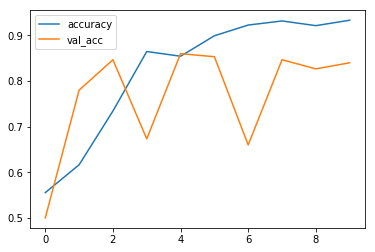

In [41]:
plt.plot(acc,label='accuracy')
plt.plot(val_acc,label='val_acc')
plt.legend()
plt.show()

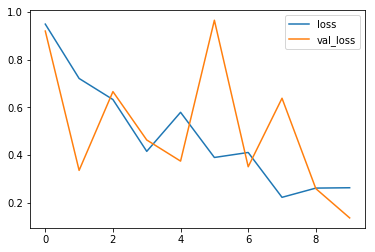

In [42]:
plt.plot(loss,label='loss')
plt.plot(val_loss,label= 'val_loss')
plt.legend()
plt.show()

In [43]:
from keras.preprocessing import image
import numpy as np
test_image = \
    image.load_img('./test/8864_idx5_x1801_y2451_class1.png',
                    target_size=(300,300))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    print('noncancer')
else:
    print('cancer')

cancer


In [44]:
test_image = \
    image.load_img('./test/8864_idx5_x201_y2301_class0.png',
                    target_size=(300,300))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    print('noncancer')
else:
    print('cancer')

cancer


In [45]:
test_image = \
    image.load_img('./test/8864_idx5_x51_y2201_class0.png',
                    target_size=(300,300))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    print('noncancer')
else:
    print('cancer')

noncancer


In [46]:
test_image = \
    image.load_img('./test/8864_idx5_x601_y2151_class0.png',
                    target_size=(300,300))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    print('noncancer')
else:
    print('cancer')

noncancer


In [47]:
test_image = \
    image.load_img('./test/8864_idx5_x1701_y2651_class1.png',
                    target_size=(300,300))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis =0)
result = model.predict(test_image)
train_generator.class_indices
if result[0][0] == 1:
    print('noncancer')
else:
    print('cancer')

cancer
